**Sentiment Analaysis on Abusive Tweets**

**1. Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
#to draw the plots immediately after the current cell
%matplotlib inline

warnings.filterwarnings('ignore')

**2. Importing and displaying out dataset**

In [3]:
df = pd.read_csv('/content/sample_data/Tweets.csv')
df.head()

,Category,Tweet
0,0,Only among Muslims can one find someone proudl...
1,0,@_sabanaqvi Only among Muslims can one find so...
2,0,"@megha_writes Muslim rapist ?"", ""truncated"": f..."
3,0,@peoplepower @ACLU A Muslim holding a placard ...
4,0,RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...


In [4]:
#naming columns
df.columns = ['Sentiment','Text']

In [5]:
df

,Sentiment,Text
0,0,Only among Muslims can one find someone proudl...
1,0,@_sabanaqvi Only among Muslims can one find so...
2,0,"@megha_writes Muslim rapist ?"", ""truncated"": f..."
3,0,@peoplepower @ACLU A Muslim holding a placard ...
4,0,RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...
...,...,...
11800,4,"b""@HalewoodMike @TookEnglandBack Won't offend ..."
11801,4,"b""RT @HalewoodMike: DOESN'T IT MAKE YOU SICK h..."
11802,4,b'RT @UKfollowgain: The twitter police have ob...
11803,4,"b""RT @whitford747: Regarding #TommyRobinson's ..."


# **3. Pre-processing/Data cleaning**

In [6]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_set = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()

#Defining basic cleaning function
def text_preproc(x):
   x=x.lower()
   x=x.encode('ascii','ignore').decode()             #remove any non-ASCII characters
   x=re.sub(r'https*\S+', ' ',x)                     #removes links
   x=re.sub(r'\w*\d+\w*', ' ', x)                    #example: "hello123world", "12345", "a1b2c3d4"
   x=re.sub(r'\s{2,}', ' ', x)                       #removes two or more consecutive whitespace characters
   x =re.sub(r'\b\w{1,3}\b', '', x)                  #removes shortwords of lenght <=3
   x= re.sub(r'@[\w]*','',x)                         #removes @
   x = re.sub(r'[^A-Za-z\s#]+','',x)                 #removing special characters, numbers and punctuations
   x=' '.join([word for word in x.split(' ') if word not in stopwords_set])
   x=''.join([wordnet.lemmatize(word) for word in x]
)
   return x

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['clean_text'] = df.Text.apply(text_preproc)

In [8]:
#Printing now cleaned text
df

,Sentiment,Text,clean_text
0,0,Only among Muslims can one find someone proudl...,among muslims find someone proudly cooing r...
1,0,@_sabanaqvi Only among Muslims can one find so...,among muslims find someone proudly cooing ...
2,0,"@megha_writes Muslim rapist ?"", ""truncated"": f...",muslim rapist truncated false entities hasht...
3,0,@peoplepower @ACLU A Muslim holding a placard ...,muslim holding placard perhaps illegals s...
4,0,RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...,bohemians home thugs african muslim play...
...,...,...,...
11800,4,"b""@HalewoodMike @TookEnglandBack Won't offend ...",offend much turn numbers deportation or...
11801,4,"b""RT @HalewoodMike: DOESN'T IT MAKE YOU SICK h...",make sick
11802,4,b'RT @UKfollowgain: The twitter police have ob...,twitter police obviously stopped #iamtommy ...
11803,4,"b""RT @whitford747: Regarding #TommyRobinson's ...",regarding #tommyrobinson twitter gone ...


**4. POS Tagging**

In [9]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tokens = nltk.word_tokenize(df['clean_text'][50])
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['dirty',
 'secret',
 'savage',
 'muslims',
 'gang',
 'raping',
 'swedish',
 'women',
 'girls',
 'little']

In [10]:
nltk.pos_tag(tokens)

[('dirty', 'NN'),
 ('secret', 'JJ'),
 ('savage', 'NN'),
 ('muslims', 'NNS'),
 ('gang', 'VBP'),
 ('raping', 'VBG'),
 ('swedish', 'JJ'),
 ('women', 'NNS'),
 ('girls', 'VBD'),
 ('little', 'JJ'),
 ('mass', 'NN'),
 ('muslim', 'NN')]

In [11]:
#Use function pos_tag(tokens) and unpenn_tagset(‘NN’) to do POS tagging and view the meaning of each tagset
import nltk
nltk.download('tagsets')
print(nltk.help.upenn_tagset('NNS'))
print(nltk.help.upenn_tagset('RB'))
print(nltk.help.upenn_tagset('VBP'))
print(nltk.help.upenn_tagset('JJ'))
print(nltk.help.upenn_tagset('VBG'))
print(nltk.help.upenn_tagset('NN'))

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
None
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
None
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
None
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
None
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    h

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


**5. Tokenization**

In [12]:
# individual words considered as tokens
tokenized_text = df['clean_text'].apply(lambda x: x.split())
tokenized_text.head()

0    [among, muslims, find, someone, proudly, cooin...
1    [among, muslims, find, someone, proudly, cooin...
2    [muslim, rapist, truncated, false, entities, h...
3    [muslim, holding, placard, perhaps, illegals, ...
4    [bohemians, home, thugs, african, muslim, play...
Name: clean_text, dtype: object

**6. Stemming**

In [13]:
#stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()
#committing became commit, holding became hold

0    [among, muslim, find, someon, proudli, coo, ra...
1    [among, muslim, find, someon, proudli, coo, ra...
2    [muslim, rapist, truncat, fals, entiti, hashta...
3    [muslim, hold, placard, perhap, illeg, shud, g...
4    [bohemian, home, thug, african, muslim, player...
Name: clean_text, dtype: object

In [14]:
# combine words into single sentence and join this to ‘clean_text’ column
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])

df['clean_text'] = tokenized_text
df.head()

,Sentiment,Text,clean_text
0,0,Only among Muslims can one find someone proudl...,among muslim find someon proudli coo rapist mu...
1,0,@_sabanaqvi Only among Muslims can one find so...,among muslim find someon proudli coo rapist mu...
2,0,"@megha_writes Muslim rapist ?"", ""truncated"": f...",muslim rapist truncat fals entiti hashtag symb...
3,0,@peoplepower @ACLU A Muslim holding a placard ...,muslim hold placard perhap illeg shud given pr...
4,0,RT @Pad_Ban: Bohemians PC. Home to AFA thugs a...,bohemian home thug african muslim player rape ...


**7. Exploratory Data Analysis**

In [15]:
!pip install wordcloud

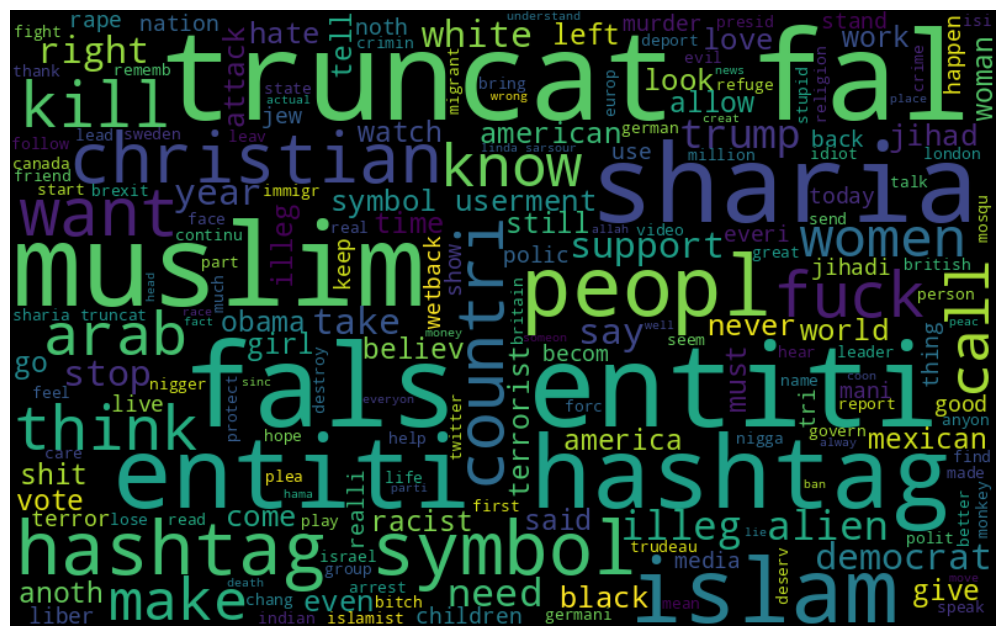

In [16]:
 #visualizing frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#larger words represent the most common words and the smaller words represent the less common words

In [17]:
# extracting hashtag
def hashtag_extract(texts):
    hashtags = []
    # loop words in the tweet
    for text in texts:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)
    return hashtags

In [18]:
# extract hashtags where sentiment == 0
ht_0 = hashtag_extract(df['clean_text'][df['Sentiment']==0])

# extract hashtags where sentiment == 1
ht_1= hashtag_extract(df['clean_text'][df['Sentiment']==1])

# extract hashtags where sentiment == 2
ht_2= hashtag_extract(df['clean_text'][df['Sentiment']==2])

# extract hashtags where sentiment == 3
ht_3= hashtag_extract(df['clean_text'][df['Sentiment']==3])

# extract hashtags where sentiment == 4
ht_4= hashtag_extract(df['clean_text'][df['Sentiment']==4])

In [19]:
ht_1[:10]

[['women', 'islam', 'terror', 'maga', 'peac'],
 ['religionofpeacendeath', 'carbomb', 'libya', 'benghazi'],
 [],
 [],
 [],
 [],
 [],
 ['maga'],
 ['toilet', 'jihad', 'bohra'],
 []]

In [20]:
ht_0[20:30] #output is in form of separate hastags for each sentence

[[],
 [],
 [],
 ['islam', 'islamophobia', 'muslim', 'tcot'],
 ['prophetmuham', 'peadophil'],
 ['canadiandoorpr'],
 [],
 [],
 [],
 []]

In [21]:
# unnest list
ht_0 = sum(ht_0, [])
ht_1 = sum(ht_1, [])
ht_2 = sum(ht_2, [])
ht_3 = sum(ht_3, [])
ht_4 = sum(ht_4, [])

In [22]:
ht_0[20:30] #combined them into one single list

['islam',
 'islamophobia',
 'muslim',
 'pjnet',
 'islam',
 'islamophobia',
 'muslim',
 'pjnet',
 'muslim',
 'terrorist']

**Plotting frequency graph**

In [23]:
#count of each hashtag in sentiment==0
freq = nltk.FreqDist(ht_0)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()


,Hashtag,Count
0,islam,79
1,islamophobia,8
2,muslim,35
3,tcot,2
4,prophetmuham,1


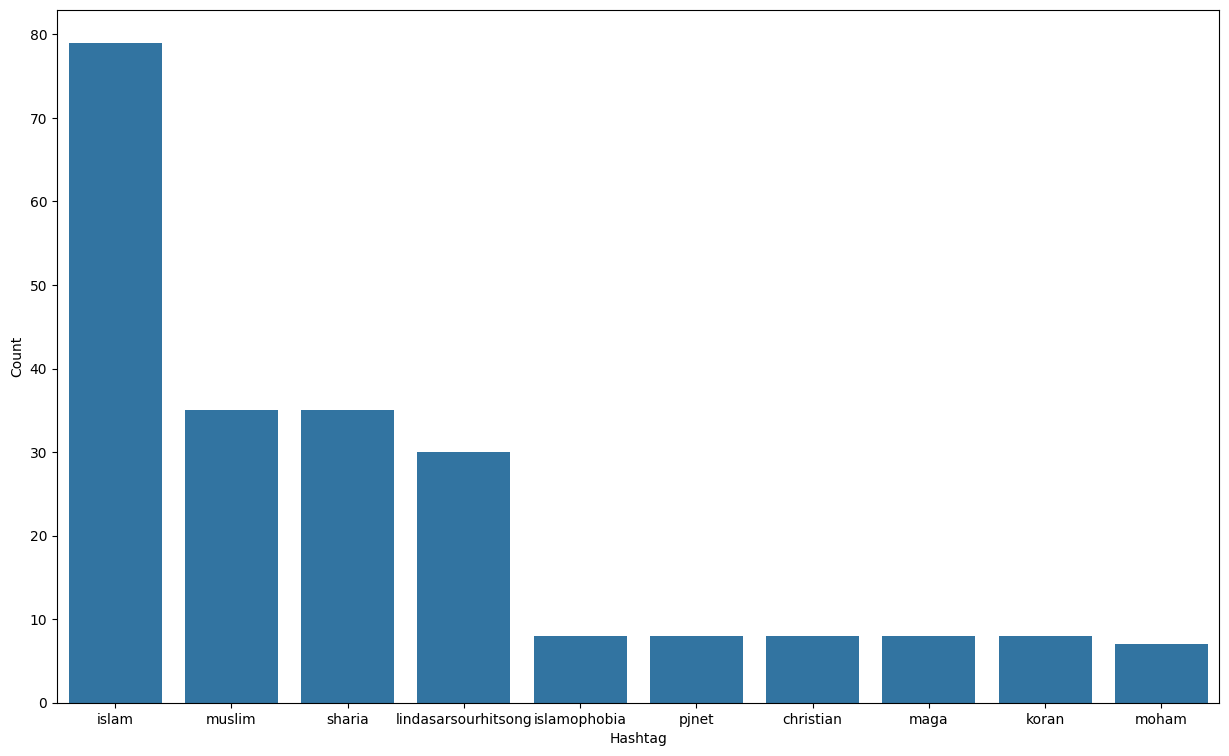

In [24]:
# select top 10 hashtags and plot
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

***Where sentiment==0 we have #islam used more number of times***

In [25]:
#count of each hashtag in sentiment==1
freq = nltk.FreqDist(ht_1)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,women,1
1,islam,8
2,terror,4
3,maga,9
4,peac,1


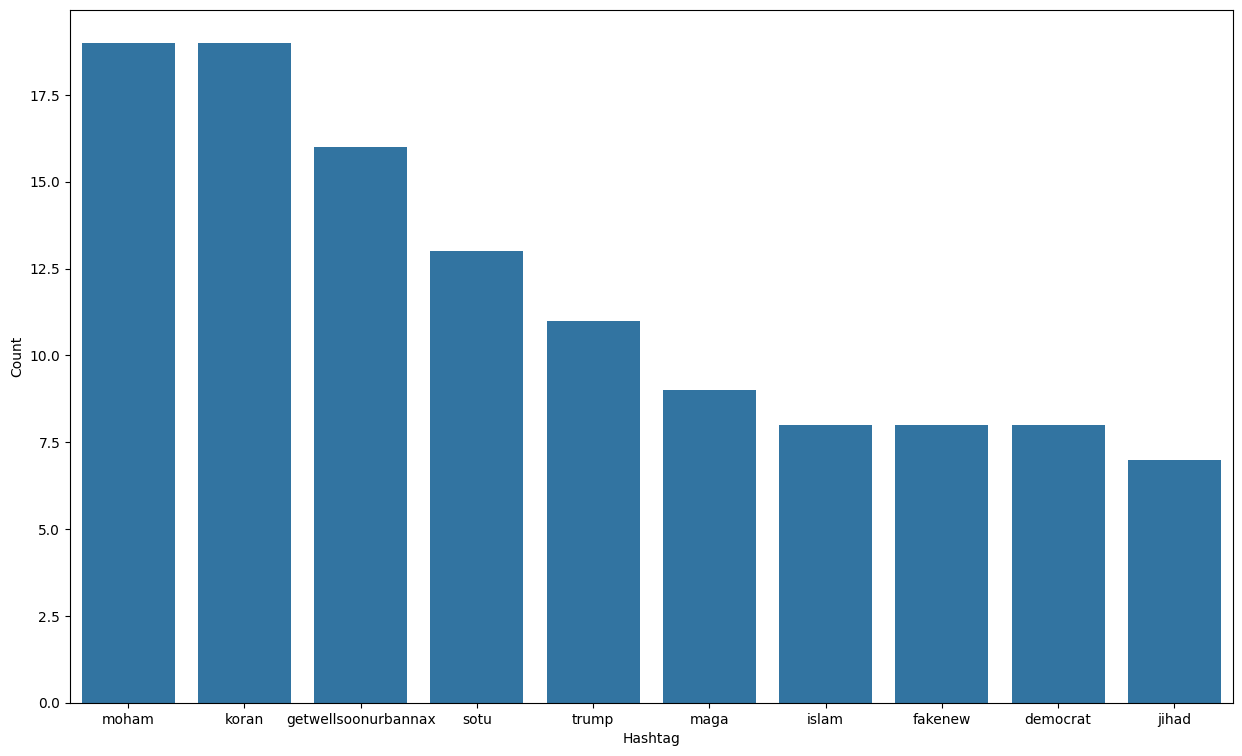

In [26]:
# select top 10 hashtags for sentiment==1
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

***Here in class of sentiment==1 we have #moham used more***

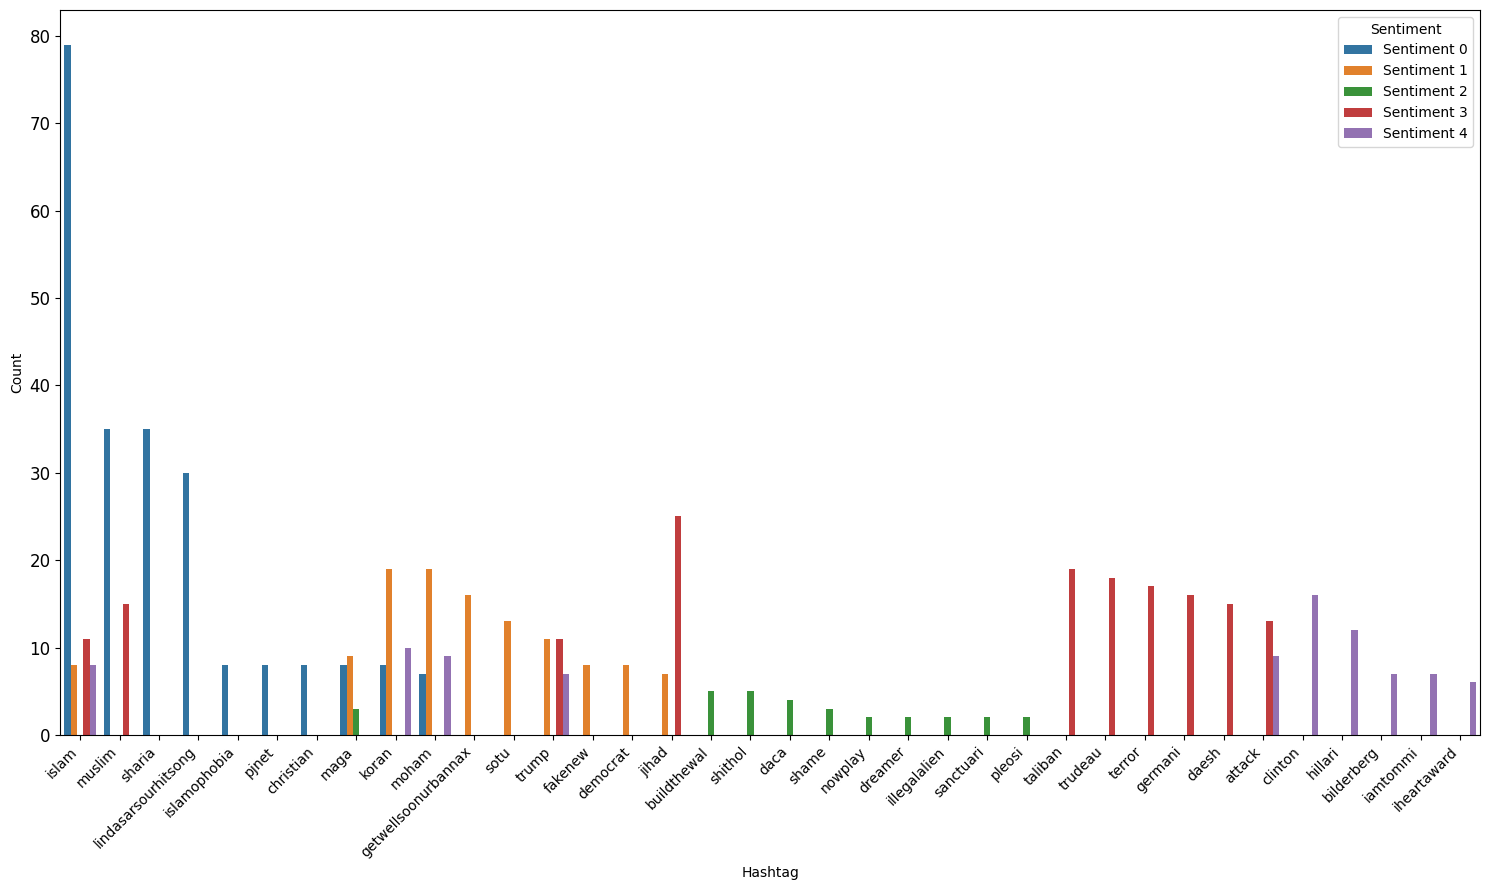

In [27]:
# create a list of all hashtags
hashes = [ht_0, ht_1, ht_2, ht_3, ht_4]

# create a list of sentiment labels
sentiment_class = ['Sentiment 0', 'Sentiment 1', 'Sentiment 2', 'Sentiment 3', 'Sentiment 4']

# create an empty list to store top 10 hashtags for each sentiment
top_hashes = []

# loop through each hashtag list and get top 10 hashtags
for i in range(len(hashes)):
    freq = nltk.FreqDist(hashes[i])
    d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})
    d = d.nlargest(columns='Count', n=10)
    d['Sentiment'] = sentiment_class[i]  # add a column for sentiment label
    top_hashes.append(d)

# combine all top 10 hashtags into a single dataframe
top_hashes = pd.concat(top_hashes)

# plot the bar chart
plt.figure(figsize=(15,9))
sns.barplot(data=top_hashes, x='Hashtag', y='Count', hue='Sentiment')
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

***Where sentiment==0:islam, sentiment==1:Moham,  sentiment==2:buildthewall,  sentiment==3:jihad, sentiment==4:clinton***

**8. Splitting Input**

In [28]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
#This wil generate bag of words/ generates matrix of words along with its occurannce
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text']) #extract features n store here

In [29]:
bow

<11805x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 55709 stored elements in Compressed Sparse Row format>

In [30]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
bow[1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

**Explanation**:
text = [‘Hello my name is james, this is my python notebook’]
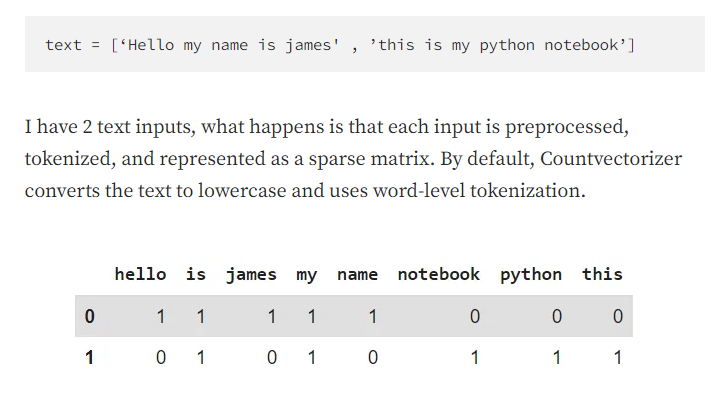

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Sentiment'], random_state=42, test_size=0.25)

#bow = training & testing
#df['Sentiment]=target (prediction)
#x_train = bow ka 75% ie which represents the features (independent variables) for training
#y_train= 75% of df['Sentiment]
#x_test= bow ka 25%         y_test=25% of df['Sentiment]

**9. Model training**

**9.1 Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [34]:
# training
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')


1.   The F1-score : combines precision and recall.How well can model correctly identify TP & TN while minimizing FP & FN
2. Accuracy:  number of correct predictions over all predictions
3. Precision (positive predictive value) ie. measure of how many of the positive predictions made are correct (true positives)
4. Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data


In [35]:
# testing using average=macro
pred = model.predict(x_test)
f1_score(y_test, pred, average='macro')
#macro takes the average of each class’s F-1 score, it treats all classes as equal, independent of sample sizes
#To return the macro F1 score all we need to do is calculate the mean of the four class F1 scores

0.6687047627731918

In [36]:
# testing using average=weighted
pred = model.predict(x_test)
f1_score(y_test, pred, average='weighted')
#averaged by using the number of instances in a class as weights
#f1score is weighted by no. of sample/instances in each class

0.6682500449191086

In [37]:
#To predict per class scores of a multi-class classification problem.
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.74719586, 0.52344416, 0.85541126, 0.62176166, 0.59571088])

In [38]:
accuracy_score(y_test,pred)

0.6670054200542005

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       591
           1       0.54      0.50      0.52       609
           2       0.88      0.84      0.86       591
           3       0.62      0.62      0.62       581
           4       0.55      0.65      0.60       580

    accuracy                           0.67      2952
   macro avg       0.67      0.67      0.67      2952
weighted avg       0.67      0.67      0.67      2952



**9.2 KNN Model**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

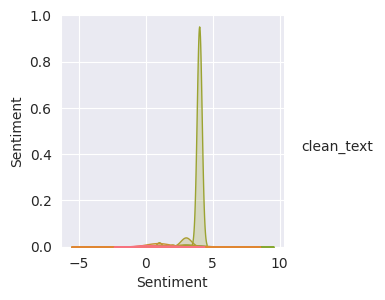

In [41]:
plt.close()
sns.set_style("darkgrid")
sns.pairplot(df, hue="clean_text", height=3)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Sentiment'], random_state=42, test_size=0.25)
#input will be features extracted i.e. bow and output will be Sentiment

In [43]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test) #These are the predicted output values

**10. Confusion Matrix**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[373  68  12  25 113]
 [ 25 217  37  27 303]
 [ 19 137 263   9 163]
 [ 76 109  15 140 241]
 [ 45  74  17  17 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       591
           1       0.36      0.36      0.36       609
           2       0.76      0.45      0.56       591
           3       0.64      0.24      0.35       581
           4       0.34      0.74      0.47       580

    accuracy                           0.48      2952
   macro avg       0.56      0.48      0.48      2952
weighted avg       0.56      0.48      0.48      2952

Accuracy: 0.481029810298103


Hence accuracy is more in Logistic Model ie. 60% and is less when we used KNearestNeighbor ie. 40% indicating that data is more suited for linear modelling rather than clustering

**11. Conclusion**
The conclusion of a sentiment analysis of abusive tweets using Multinomial Logistic Regression and KNN model depends on the specific dataset and analysis conducted.In our case, accuracy of Multinomial Logistic Regression is more as compared to KNN indicating that the data is more suited for linear modeling rather than clustering. Overall, the choice of the most suitable model for sentiment analysis of abusive tweets depends on various factors such as the characteristics of the dataset, the goals of the analysis, and the resources available.